In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
df = pd.DataFrame(
     [ [9,1],
      [6,1],
       [4,0],
       [4,1],
       [2,0],
       [3,0],
       [5,1],
      [7,1],
       [8,1],
       [6,0]
       ], columns = ['X', 'y']
)

In [ ]:
df

,X,y
0,9,1
1,6,1
2,4,0
3,4,1
4,2,0
5,3,0
6,5,1
7,7,1
8,8,1
9,6,0


In [ ]:
# normally we are using the log base e not a natural log
# and normally we use the log loss function , not loss funciton
# and in first step we find out log(odds) and log(odds) = log(5/3) = 0.51

In [ ]:
# We need to calculate the probability  P = 1/ (1+ e^-log(odds))

In [ ]:
# initial prediction

df['pre1(log-odds)'] = np.log(6/4)
df

,X,y,pre1(log-odds)
0,9,1,0.405465
1,6,1,0.405465
2,4,0,0.405465
3,4,1,0.405465
4,2,0,0.405465
5,3,0,0.405465
6,5,1,0.405465
7,7,1,0.405465
8,8,1,0.405465
9,6,0,0.405465


In [ ]:
import numpy as np
# convert log odds to probability
df['pre1(probability)'] = 1/(1+np.exp(-np.log(6/4)))
df

,X,y,pre1(log-odds),pre1(probability)
0,9,1,0.405465,0.6
1,6,1,0.405465,0.6
2,4,0,0.405465,0.6
3,4,1,0.405465,0.6
4,2,0,0.405465,0.6
5,3,0,0.405465,0.6
6,5,1,0.405465,0.6
7,7,1,0.405465,0.6
8,8,1,0.405465,0.6
9,6,0,0.405465,0.6


In [ ]:
# calculating residual for stage 1
df['res1'] = df['y'] - df['pre1(probability)']
df

,X,y,pre1(log-odds),pre1(probability),res1
0,9,1,0.405465,0.6,0.4
1,6,1,0.405465,0.6,0.4
2,4,0,0.405465,0.6,-0.6
3,4,1,0.405465,0.6,0.4
4,2,0,0.405465,0.6,-0.6
5,3,0,0.405465,0.6,-0.6
6,5,1,0.405465,0.6,0.4
7,7,1,0.405465,0.6,0.4
8,8,1,0.405465,0.6,0.4
9,6,0,0.405465,0.6,-0.6


In [ ]:
# training the first decision tree
from sklearn.tree import DecisionTreeRegressor

reg1 = DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

reg1.fit(df.iloc[:,0:2].values, df.iloc[:,-1].values)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

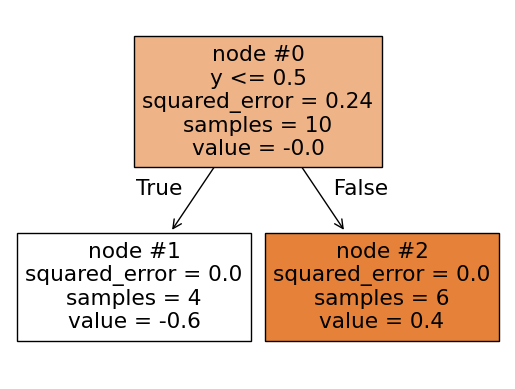

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(reg1, feature_names=['X','y'],filled=True, node_ids=True)
plt.show()

In [ ]:
df['leaf_entry1'] = reg1.apply(df.iloc[:,0:2])
df

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,X,y,pre1(log-odds),pre1(probability),res1,leaf_entry1
0,9,1,0.405465,0.6,0.4,2
1,6,1,0.405465,0.6,0.4,2
2,4,0,0.405465,0.6,-0.6,1
3,4,1,0.405465,0.6,0.4,2
4,2,0,0.405465,0.6,-0.6,1
5,3,0,0.405465,0.6,-0.6,1
6,5,1,0.405465,0.6,0.4,2
7,7,1,0.405465,0.6,0.4,2
8,8,1,0.405465,0.6,0.4,2
9,6,0,0.405465,0.6,-0.6,1


In [ ]:
def return_logs(leaf):
  temp_df = df[df['leaf_entry1'] == leaf]
  num = temp_df['res1'].sum()

  den = sum(temp_df['pre1(probability)'] * (1 - temp_df['pre1(probability)']))
  return round(num/den,2)

In [ ]:
df['pre2(log-odds)'] = df['pre1(log-odds)'] +0.1* df['leaf_entry1'].apply(return_logs)

In [ ]:
df['pre2(probability)'] = 1/(1+np.exp(-df['pre2(log-odds)']))
df

,X,y,pre1(log-odds),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability)
0,9,1,0.405465,0.6,0.4,2,0.572465,0.639332
1,6,1,0.405465,0.6,0.4,2,0.572465,0.639332
2,4,0,0.405465,0.6,-0.6,1,0.155465,0.538788
3,4,1,0.405465,0.6,0.4,2,0.572465,0.639332
4,2,0,0.405465,0.6,-0.6,1,0.155465,0.538788
5,3,0,0.405465,0.6,-0.6,1,0.155465,0.538788
6,5,1,0.405465,0.6,0.4,2,0.572465,0.639332
7,7,1,0.405465,0.6,0.4,2,0.572465,0.639332
8,8,1,0.405465,0.6,0.4,2,0.572465,0.639332
9,6,0,0.405465,0.6,-0.6,1,0.155465,0.538788


In [ ]:
df['res2'] = df['y'] - df['pre2(probability)']
df

,X,y,pre1(log-odds),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability),res2
0,9,1,0.405465,0.6,0.4,2,0.572465,0.639332,0.360668
1,6,1,0.405465,0.6,0.4,2,0.572465,0.639332,0.360668
2,4,0,0.405465,0.6,-0.6,1,0.155465,0.538788,-0.538788
3,4,1,0.405465,0.6,0.4,2,0.572465,0.639332,0.360668
4,2,0,0.405465,0.6,-0.6,1,0.155465,0.538788,-0.538788
5,3,0,0.405465,0.6,-0.6,1,0.155465,0.538788,-0.538788
6,5,1,0.405465,0.6,0.4,2,0.572465,0.639332,0.360668
7,7,1,0.405465,0.6,0.4,2,0.572465,0.639332,0.360668
8,8,1,0.405465,0.6,0.4,2,0.572465,0.639332,0.360668
9,6,0,0.405465,0.6,-0.6,1,0.155465,0.538788,-0.538788


In [ ]:
reg2 = DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

reg2.fit(df.iloc[:,0:2].values, df.iloc[:,-1].values)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

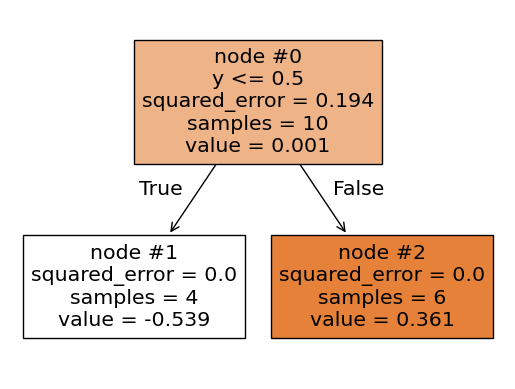

In [ ]:
plot_tree(reg2, feature_names=['X','y'],filled=True, node_ids=True)
plt.show()

In [ ]:
df['leaf_entry2'] = reg2.apply(df.iloc[:,0:2])
df

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,X,y,pre1(log-odds),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability),res2,leaf_entry2
0,9,1,0.405465,0.6,0.4,2,0.572465,0.639332,0.360668,2
1,6,1,0.405465,0.6,0.4,2,0.572465,0.639332,0.360668,2
2,4,0,0.405465,0.6,-0.6,1,0.155465,0.538788,-0.538788,1
3,4,1,0.405465,0.6,0.4,2,0.572465,0.639332,0.360668,2
4,2,0,0.405465,0.6,-0.6,1,0.155465,0.538788,-0.538788,1
5,3,0,0.405465,0.6,-0.6,1,0.155465,0.538788,-0.538788,1
6,5,1,0.405465,0.6,0.4,2,0.572465,0.639332,0.360668,2
7,7,1,0.405465,0.6,0.4,2,0.572465,0.639332,0.360668,2
8,8,1,0.405465,0.6,0.4,2,0.572465,0.639332,0.360668,2
9,6,0,0.405465,0.6,-0.6,1,0.155465,0.538788,-0.538788,1


In [ ]:
def return_logs(leaf):
  num = df[df['leaf_entry2'] == leaf]['res2'].sum()
  den = sum(df[df['leaf_entry2'] == leaf]['pre2(probability)'] * (1 - df[df['leaf_entry2'] == leaf]['pre2(probability)']))
  return round(num/den,2)


In [ ]:
df['pre3(log-odds)'] = df['pre1(log-odds)'] + df['pre2(log-odds)'] + df['leaf_entry2'].apply(return_logs)

In [ ]:
df['pre3(probability)'] = 1/(1+np.exp(-df['pre3(log-odds)']))
df

,X,y,pre1(log-odds),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability),res2,leaf_entry2,pre3(log-odds),pre3(probability)
0,9,1,0.405465,0.6,0.4,2,0.572465,0.639332,0.360668,2,2.53793,0.926758
1,6,1,0.405465,0.6,0.4,2,0.572465,0.639332,0.360668,2,2.53793,0.926758
2,4,0,0.405465,0.6,-0.6,1,0.155465,0.538788,-0.538788,1,-1.60907,0.166718
3,4,1,0.405465,0.6,0.4,2,0.572465,0.639332,0.360668,2,2.53793,0.926758
4,2,0,0.405465,0.6,-0.6,1,0.155465,0.538788,-0.538788,1,-1.60907,0.166718
5,3,0,0.405465,0.6,-0.6,1,0.155465,0.538788,-0.538788,1,-1.60907,0.166718
6,5,1,0.405465,0.6,0.4,2,0.572465,0.639332,0.360668,2,2.53793,0.926758
7,7,1,0.405465,0.6,0.4,2,0.572465,0.639332,0.360668,2,2.53793,0.926758
8,8,1,0.405465,0.6,0.4,2,0.572465,0.639332,0.360668,2,2.53793,0.926758
9,6,0,0.405465,0.6,-0.6,1,0.155465,0.538788,-0.538788,1,-1.60907,0.166718


In [ ]:
df['res_final'] = df['y'] - df['pre3(probability)']

df[['res1','res2','res_final']]

,res1,res2,res_final
0,0.4,0.360668,0.073242
1,0.4,0.360668,0.073242
2,-0.6,-0.538788,-0.166718
3,0.4,0.360668,0.073242
4,-0.6,-0.538788,-0.166718
5,-0.6,-0.538788,-0.166718
6,0.4,0.360668,0.073242
7,0.4,0.360668,0.073242
8,0.4,0.360668,0.073242
9,-0.6,-0.538788,-0.166718
